# Homework 2.2
###### by Mher Movsisyan
---

### Problem 1:  
Find the $ \psi $ s of linear solution for the following ARMA model
$$ x_t = 0.7x_{t-1} - 0.1225x_{t-2} + w_t - 0.35w_{w_t-1} $$  
a) Write down ARMA model using backshift operators.


Answer:  
$$ x_t(1 - 0.7B + 0.1225B^2) = w_t(1 - 0.35B) $$

b) Find the roots of characteristic equations.

Answer:  
The polynomial on the AR part is quadratic convex,
$$ f'(B) = 0.245B - 0.7 $$
Setting it = 0 will yield  
$$ B \approx 2.857 $$

It has one root, as we do the same with the MA part we get the same root

### Problem 2:  
Find Yule-Walker estimators of $ \phi s $ 𝑎𝑛𝑑 $ \sigma^2_2 $ for the dataset

a) Plot ACF and PACF and decide order of ARMA model.

Answer:  

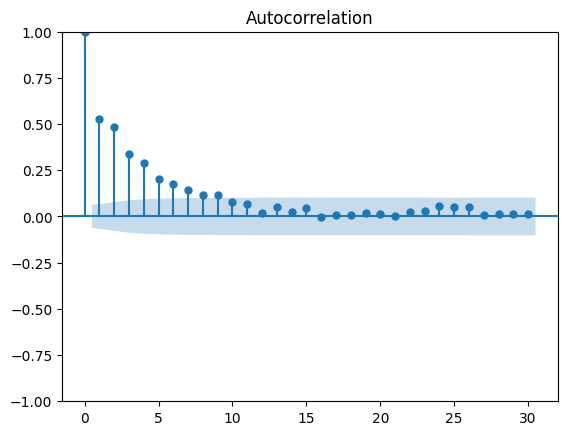

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.simplefilter("ignore")

data = pd.read_csv("data_S23_problem2_hw2_2.csv")

plot_acf(data)
plt.show()

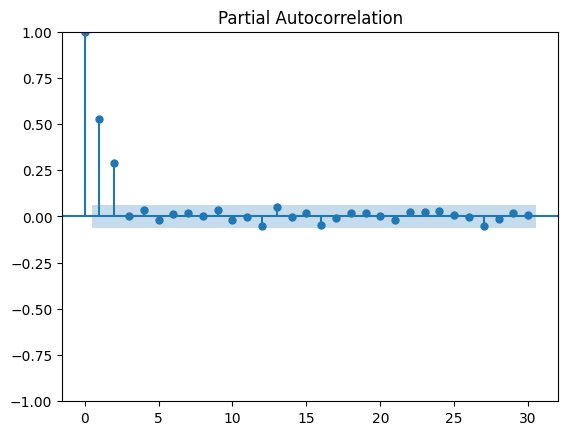

In [8]:
plot_pacf(data)
plt.show()

It's an ARMA(3, 0)

c) Use the dataset to extract values of autocovariance.  
d) Use calculated autocovariances to solve the system of equations to find estimates of $ \phi 𝑠 $ 𝑎𝑛𝑑 $ \sigma^2_𝑤 $

In [11]:
mean_data = data.mean()

# Calculate the autocovariance for lag 0 and lag 1
def autocovariance(data, mean_data, lag):
    n = len(data)
    return np.sum((data[:n - lag] - mean_data) * (data[lag:] - mean_data)) / (n - 1)

autocov_0 = autocovariance(data, mean_data, 0)
autocov_1 = autocovariance(data, mean_data, 1)

phi_estimate = autocov_1 / autocov_0
sigma_w_squared_estimate = autocov_0 - (phi_estimate * autocov_1)

print("Estimated phi: ", phi_estimate)
print("Estimated sigma_w_squared: ", sigma_w_squared_estimate)

Estimated phi:  x    0.997193
dtype: float64
Estimated sigma_w_squared:  x    0.008508
dtype: float64


### Problem 3:  
For the following model, where $ \sigma_w^2 = 1 $
$$ x_t = w_t + 0.6w_{t-1} - 0.4w_{t-2} $$

a) Calculate theoretical autocovariances for different lags.  
b) Apply innovations algorithm to recursively predict $ x_2^1, \dots, x_5^4 and calculate their respective mean squared errors.

Answer:  
$$ \gamma(0) = Var(w_t + 0.6 w_{t-1} - 0.4w_{t-2}) = 1.52 $$

$$ \gamma(1) = 0.2 $$

$$ \gamma(2) = -0.4

and 0 for all greater lags

In [17]:
sigma_w_squared = 1
coef = np.array([1, 0.6, -0.4])

x = [np.random.normal(0, 1), np.random.normal(0, 1)]
for _ in range(250):
    x.append(np.random.normal(0, 1) + 0.6 * x[-1] - 0.4 * x[-2])

g_0 = 1.52
g_1 = 0.2
g_2 = -0.4

predicted_values = [0, 0]
mse = []

for t in range(2, 5):
    x_t_minus_1 = np.flip(x[t-2:t])
    cov_vector = np.array([g_1, g_2])[:t]
    mse_t = g_0 - np.dot(cov_vector, np.flip(cov_vector))
    kalman_gain = np.dot(cov_vector, np.flip(cov_vector)) / mse_t
    prediction_error = x[t] - np.dot(coef[1:t+1], x_t_minus_1)
    x_t_t_minus_1 = np.dot(coef[1:t+1], x_t_minus_1) + kalman_gain * prediction_error

predicted_values.append(x_t_t_minus_1)
mse.append(mse_t)

print("Predicted values: ", predicted_values[1:])
print("Mean squared errors: ", mse)

Predicted values:  [0, 0.1059087824041909]
Mean squared errors:  [1.6800000000000002]
